In [1]:
#Reading data
import pandas as pd
sleep_data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_data.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [2]:
#The dimention of data
sleep_data.shape

(374, 13)

In [3]:
sleep_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [4]:
# for empty and type of values
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#Null processing
sleep_data.fillna("None", inplace=True)

In [6]:
#statistical info
sleep_data.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [7]:
sleep_data.describe(include='O')

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            374
unique      2         11            4             25              3
top      Male      Nurse       Normal         130/85           None
freq      189         73          195             99            219

In [8]:
sleep_data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [9]:
#For mathematical operations and Visualisation
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import os

In [10]:
#For saving images
!pip install -U kaleido

In [11]:
sleep_data['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [12]:

fig = px.histogram(sleep_data, x='Sleep Disorder', color='Sleep Disorder',color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'])
fig.show()

if not os.path.exists('EDA'):
    os.makedirs('EDA')

fig.write_image("EDA/sleep_disorder_histogram.png")


In [13]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

In [14]:
fig = px.histogram(sleep_data, x='Sleep Disorder', color='Gender', barmode='stack',
                   color_discrete_sequence=['#4A235A','#C39BD3'])  

fig.update_layout(
    title='<b>Distribution of persons have sleep disorder or not by gender</b>',
    title_font={'size': 25}
)

fig.update_yaxes(showgrid=False)

fig.update_traces(marker=dict(line=dict(width=0.5)))

fig.show()
fig.write_image("EDA/gender.png")

In [15]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Nurse                    3
                Doctor                   3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

In [16]:
fig=px.treemap(sleep_data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()
fig.write_image("EDA/job.png")

In [17]:
filtered_sleep_data = sleep_data[sleep_data['Stress Level'].isin([3, 4, 5, 6, 7, 8])]

fig = px.histogram(filtered_sleep_data, x='Sleep Disorder',
                   color='Sleep Disorder',
                   facet_col='Stress Level',
                   barmode='group',
                   category_orders={"Stress Level": [3, 4, 5, 6, 7, 8]},  
                   color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'],
                   opacity=.8)

fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..', title_font={'size': 30})

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/stress level.png")

In [18]:
fig=px.sunburst(sleep_data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()
fig.write_image("EDA/quality of sleep.png")

In [19]:
fig = px.violin(sleep_data, y='Sleep Duration', x='Sleep Disorder',
                color='Sleep Disorder', 
                color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'],
                box=True)  

fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  title_font={'size': 24},
                  showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()
fig.write_image("EDA/sleep duration.png")

In [20]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'],
                 violinmode='overlay',
                 box=True)
               

fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25}
                 )

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/activities.png")

In [21]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Daily Steps',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'],
                 violinmode='overlay',
                 box=True)
               

fig.update_layout(title='<b>The effect of daily steps on sleep </b>..',
                 title_font={'size':25}
                 )

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/daily steps.png")

In [22]:
fig=px.ecdf(sleep_data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25}
                 )


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False,title='Cumulative Probability')
fig.show()
fig.write_image("EDA/age.png")

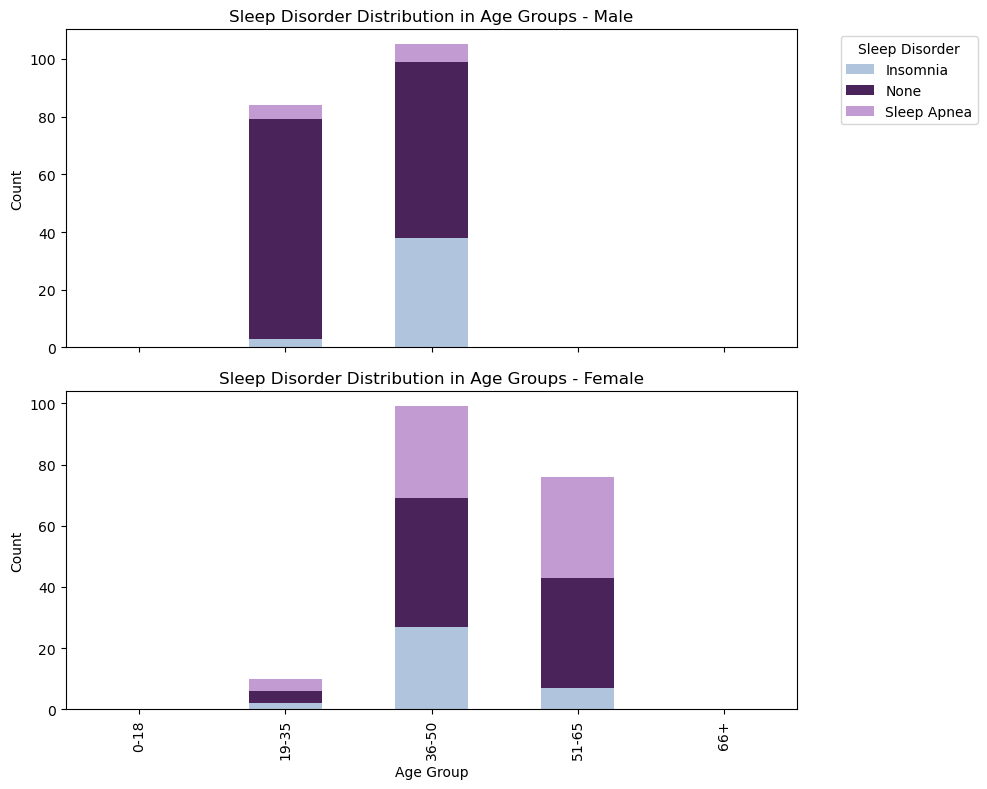

In [23]:
bins = [0, 18, 35, 50, 65, 100]  
labels = ['0-18', '19-35', '36-50', '51-65', '66+']  
sleep_data['Age Group'] = pd.cut(sleep_data['Age'], bins=bins, labels=labels)
colors = ['#B0C4DE','#4A235A','#C39BD3']
genders = sleep_data['Gender'].unique()
pivot_data = sleep_data.pivot_table(index='Age Group', columns=['Gender', 'Sleep Disorder'], values='Age', aggfunc='count', fill_value=0)

fig, axes = plt.subplots(nrows=len(genders), figsize=(10, 8), sharex=True)
for idx, gender in enumerate(genders):
    gender_data = pivot_data.xs(gender, level='Gender', axis=1)
    gender_data.plot(kind='bar', stacked=True, ax=axes[idx], legend=idx==0, title=f"Sleep Disorder Distribution in Age Groups - {gender}", color=colors)
    axes[idx].set_ylabel('Count')

if len(genders) > 0:
    axes[0].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放置在图外

plt.tight_layout()
plt.savefig('EDA/age and gender.png')
plt.show()

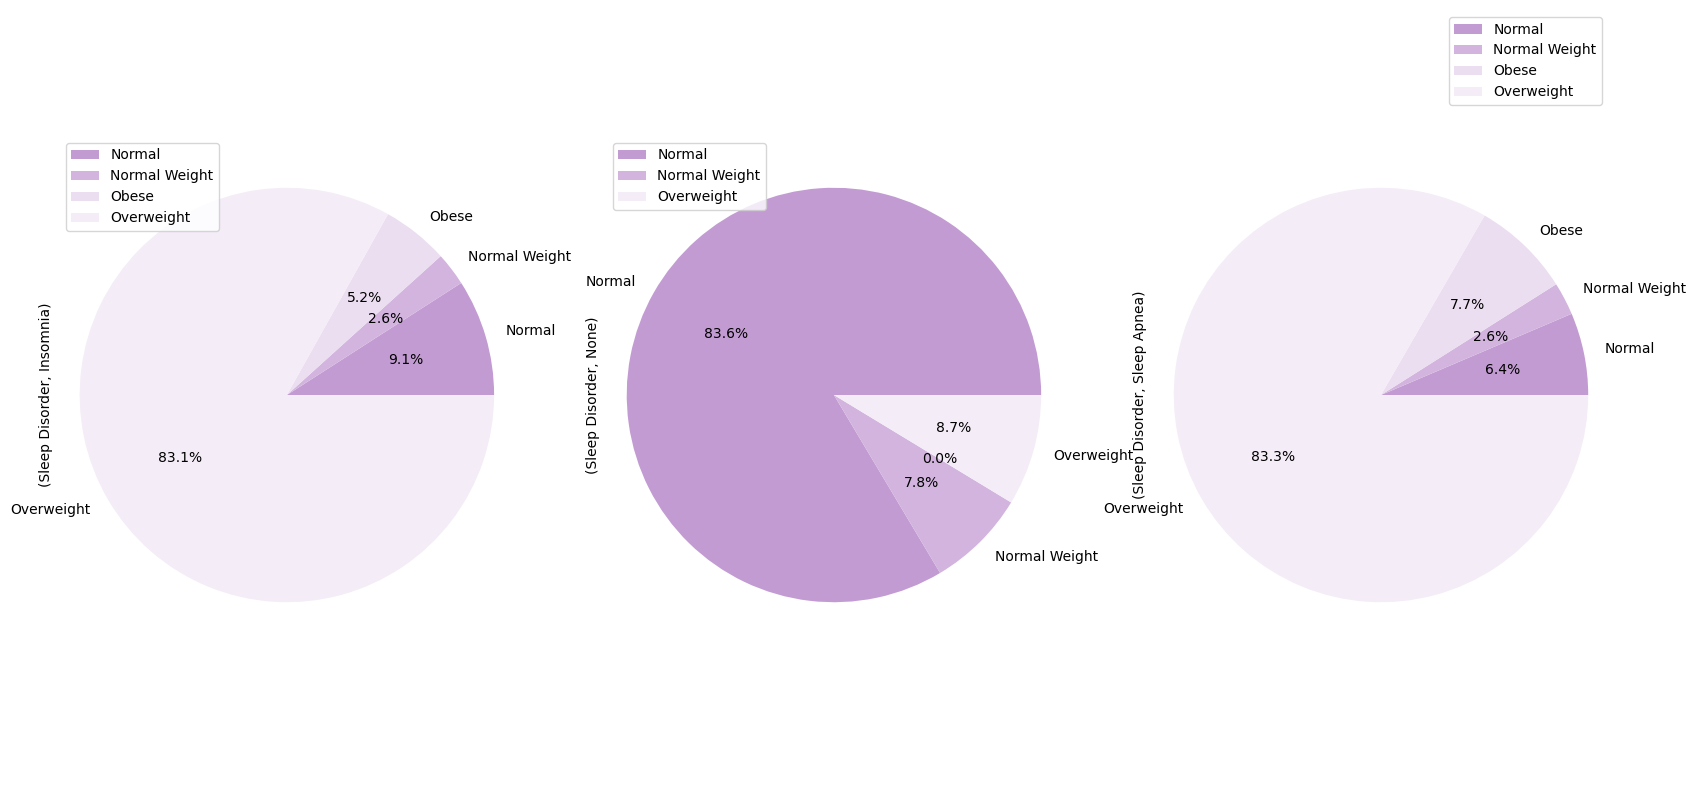

In [24]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.savefig('EDA/BMI.png')
plt.show()

In [25]:
# classify blood pressure
sleep_data['Blood Pressure'] = sleep_data['Blood Pressure'].apply(
    lambda x: 'normal' if x in ['120/80', '126/83', '125/80', '128/84', '129/84', '117/76', '118/76', '115/75', '125/82', '122/80'] else 'high')


In [26]:
sleep_data.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder Age Group  
0         normal          77         4200           None     19-35  
1         normal          75        10000           None     19-35  
2         normal          75        10000           None     19-35  
3           high          85         3000    Sleep Apnea     19-35  
4           high          85         3000    Sleep Apnea     19-35

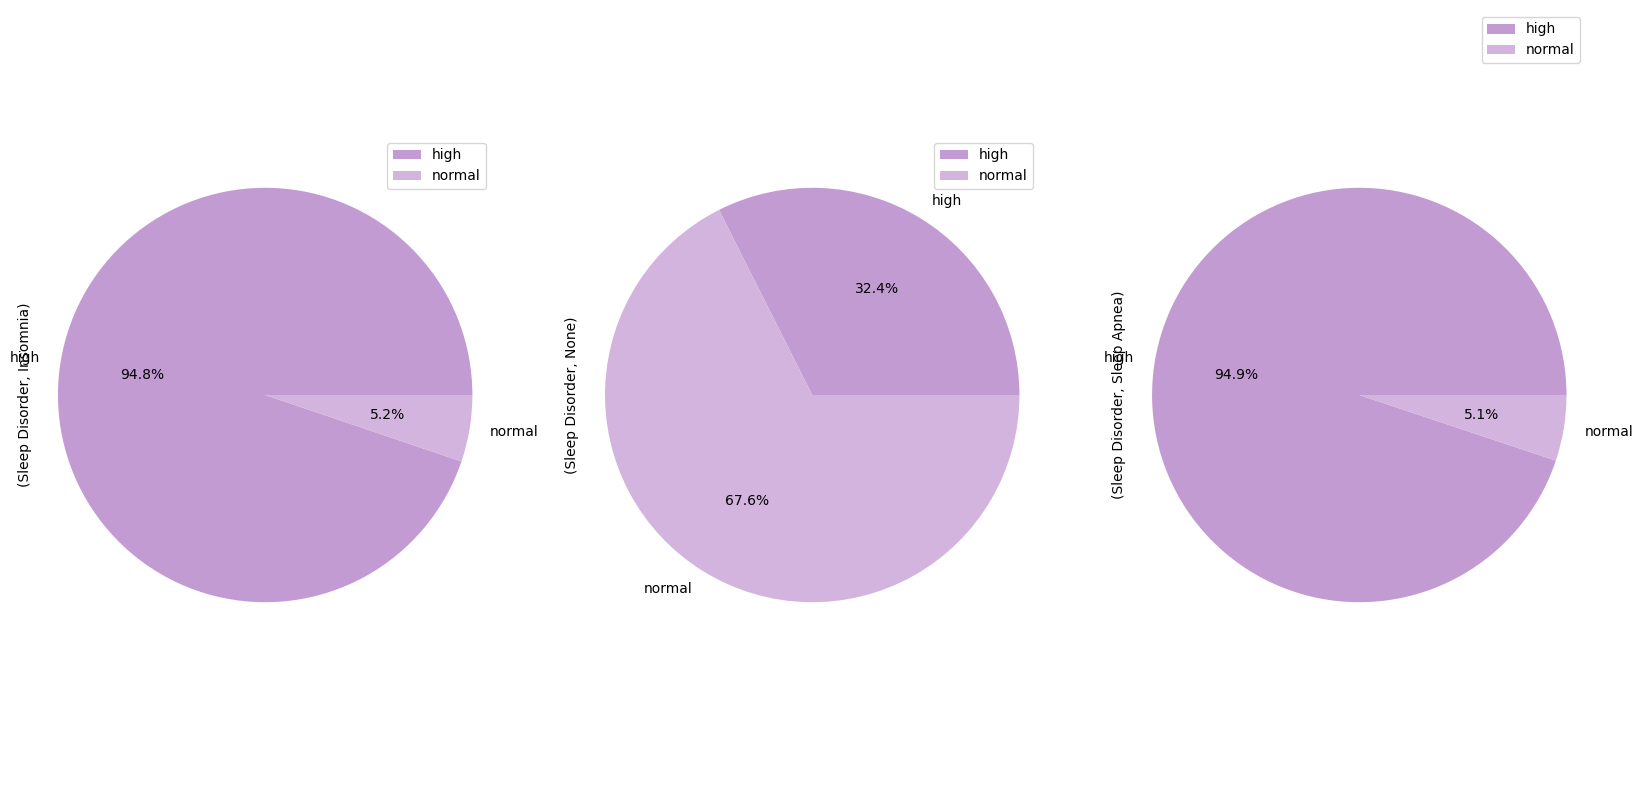

In [27]:
sleep_data.pivot_table(index='Blood Pressure',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.savefig('EDA/Blood Pressure.png')
plt.show()

In [28]:
fig = px.violin(sleep_data, y='Heart Rate', x='Blood Pressure', 
                color='Sleep Disorder', box=True, 
                color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'])

fig.update_layout(title='<b>The relationship between Blood Pressure and their effect on Heart Rate by Sleep Disorder</b>',
                  title_font={'size': 20}, showlegend=True)

fig.show()
fig.write_image("EDA/Blood pressure and heart rate.png")


## Adjust to binary classification problem

In [29]:
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].replace(['Insomnia', 'Sleep Apnea'], 'Has Disorder')

In [30]:
category_distribution = sleep_data['Sleep Disorder'].value_counts(normalize=True) * 100
print(category_distribution)

Sleep Disorder
None            58.55615
Has Disorder    41.44385
Name: proportion, dtype: float64


In [31]:

fig = px.histogram(sleep_data, x='Sleep Disorder', color='Sleep Disorder',color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'])
fig.show()

fig.write_image("EDA/sleep_disorder_histogram_merge.png")

In [32]:
fig = px.histogram(sleep_data, x='Sleep Disorder', color='Gender', barmode='stack',
                   color_discrete_sequence=['#4A235A','#C39BD3'])  

fig.update_layout(
    title='<b>Distribution of persons have sleep disorder or not by gender</b>',
    title_font={'size': 25}
)

fig.update_yaxes(showgrid=False)

fig.update_traces(marker=dict(line=dict(width=0.5)))

fig.show()
fig.write_image("EDA/gender_merge.png")

In [33]:
fig=px.treemap(sleep_data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()
fig.write_image("EDA/job_merge.png")

In [34]:
filtered_sleep_data = sleep_data[sleep_data['Stress Level'].isin([3, 4, 5, 6, 7, 8])]

fig = px.histogram(filtered_sleep_data, x='Sleep Disorder',
                   color='Sleep Disorder',
                   facet_col='Stress Level',
                   barmode='group',
                   category_orders={"Stress Level": [3, 4, 5, 6, 7, 8]},  
                   color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'],
                   opacity=.8)

fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..', title_font={'size': 30})

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/stress level_merge.png")

In [35]:
fig=px.sunburst(sleep_data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()
fig.write_image("EDA/quality of sleep_merge.png")

In [36]:
import plotly.express as px

fig = px.violin(sleep_data, y='Sleep Duration', x='Sleep Disorder',
                color='Sleep Disorder', 
                color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'],
                box=True)  

fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  title_font={'size': 24},
                  showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()
fig.write_image("EDA/sleep duration_merge.png")


In [37]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'],
                 violinmode='overlay',
                 box=True)
               

fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25}
                 )

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/activities_merge.png")

In [38]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Daily Steps',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'],
                 violinmode='overlay',
                 box=True)
               

fig.update_layout(title='<b>The effect of daily steps on sleep </b>..',
                 title_font={'size':25}
                 )

fig.update_yaxes(showgrid=False)
fig.show()
fig.write_image("EDA/daily steps_merge.png")

In [39]:
fig=px.ecdf(sleep_data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['#B0C4DE','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25}
                 )


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False,title='Cumulative Probability')
fig.show()
fig.write_image("EDA/ages_merge.png")

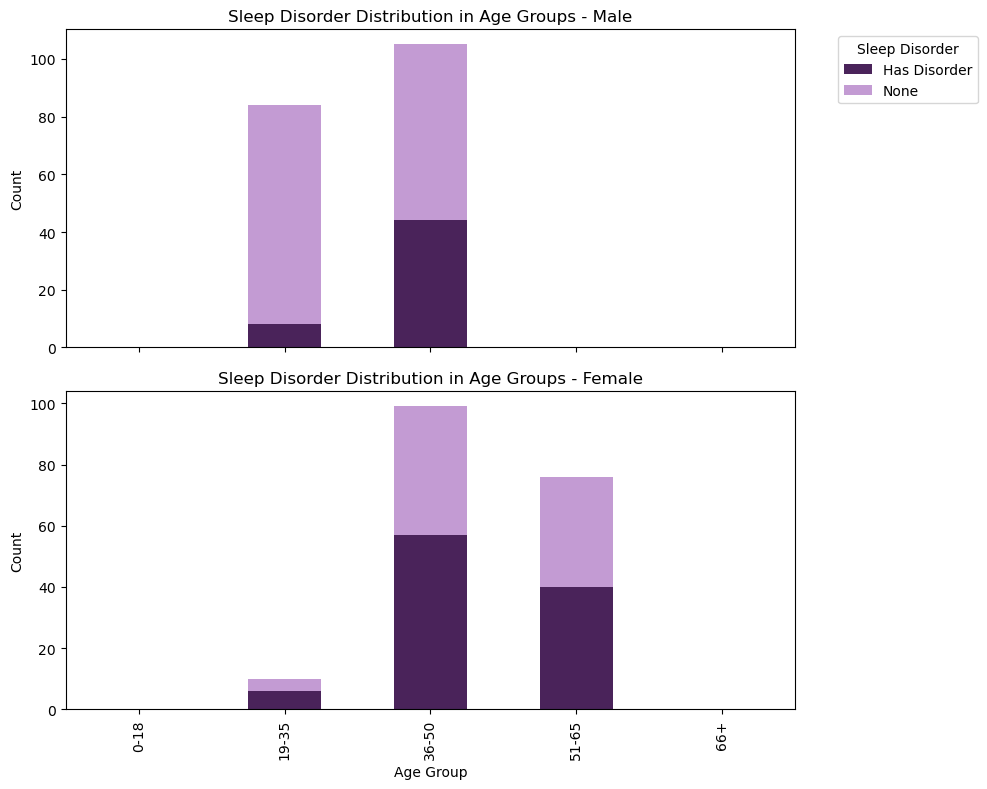

In [40]:
bins = [0, 18, 35, 50, 65, 100]  
labels = ['0-18', '19-35', '36-50', '51-65', '66+']  
sleep_data['Age Group'] = pd.cut(sleep_data['Age'], bins=bins, labels=labels)
colors = ['#4A235A','#C39BD3']
genders = sleep_data['Gender'].unique()
pivot_data = sleep_data.pivot_table(index='Age Group', columns=['Gender', 'Sleep Disorder'], values='Age', aggfunc='count', fill_value=0)

fig, axes = plt.subplots(nrows=len(genders), figsize=(10, 8), sharex=True)
for idx, gender in enumerate(genders):
    gender_data = pivot_data.xs(gender, level='Gender', axis=1)
    gender_data.plot(kind='bar', stacked=True, ax=axes[idx], legend=idx==0, title=f"Sleep Disorder Distribution in Age Groups - {gender}", color=colors)
    axes[idx].set_ylabel('Count')

if len(genders) > 0:
    axes[0].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放置在图外

plt.tight_layout()
plt.savefig('EDA/age and gender_merge.png')
plt.show()

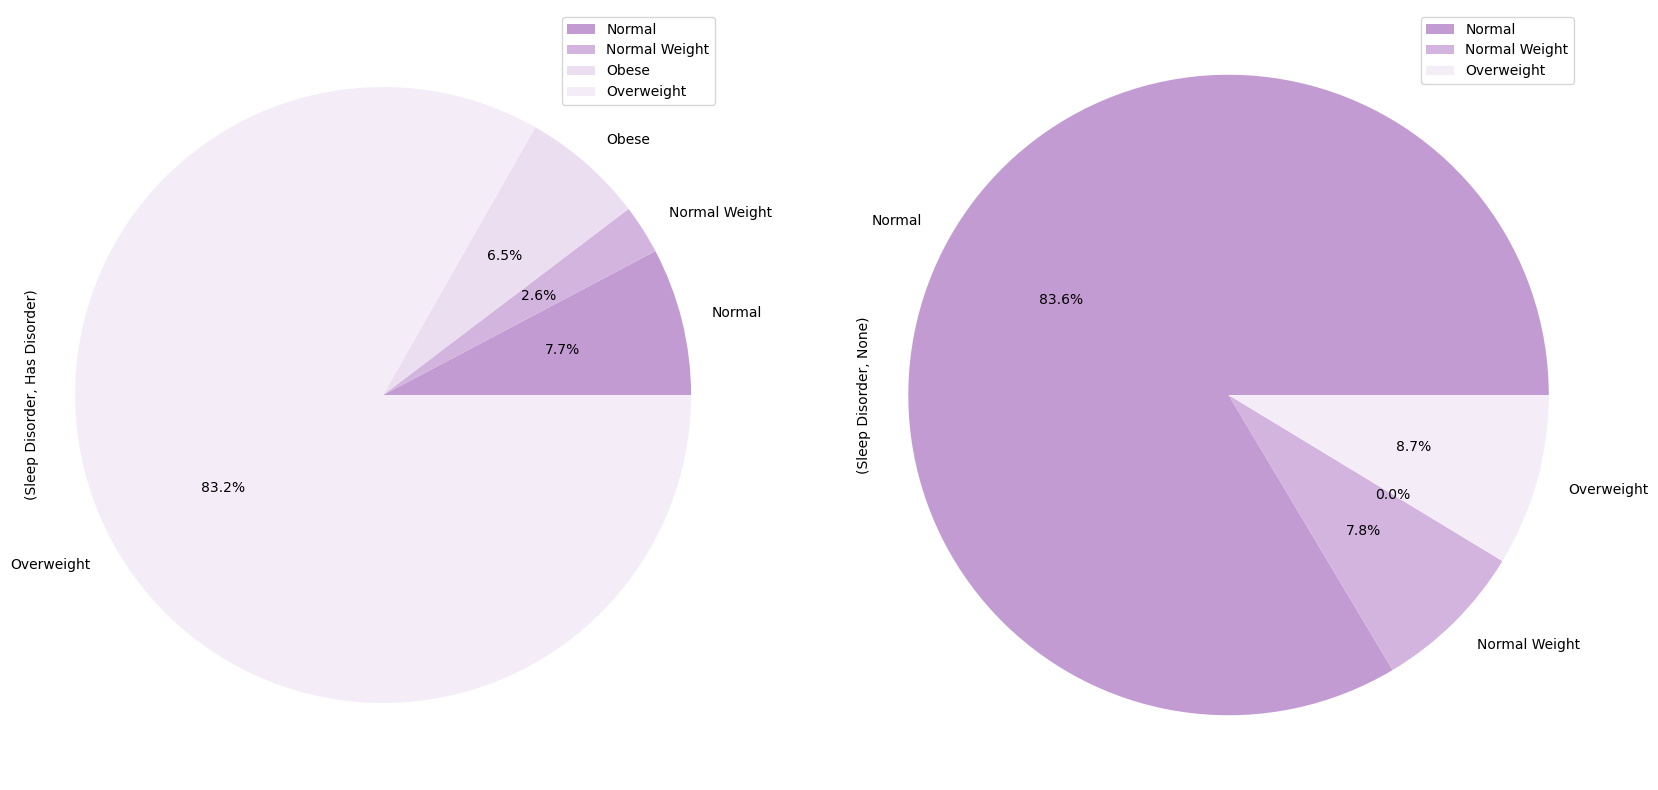

In [41]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.savefig('EDA/BMI_merge.png')
plt.show()

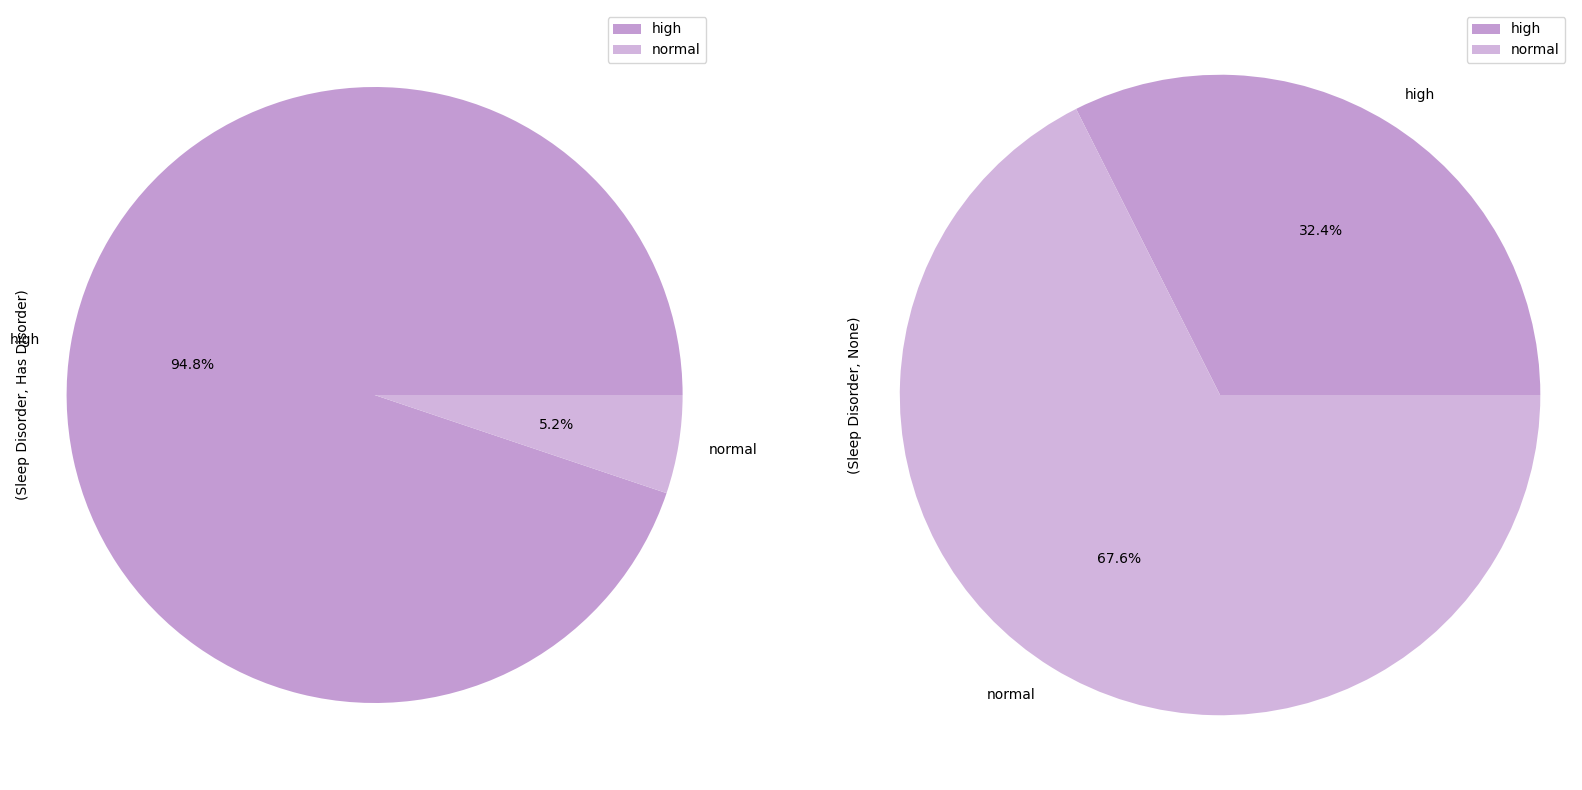

In [42]:
sleep_data.pivot_table(index='Blood Pressure',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.savefig('EDA/blood pressure_merge.png')
plt.show()

In [43]:
fig = px.violin(sleep_data, y='Heart Rate', x='Blood Pressure', 
                color='Sleep Disorder', box=True, 
                color_discrete_sequence=['#B0C4DE', '#4A235A', '#C39BD3'])

fig.update_layout(title='<b>The relationship between Blood Pressure and their effect on Heart Rate by Sleep Disorder</b>',
                  title_font={'size': 20}, showlegend=True)

fig.show()
fig.write_image("EDA/blood pressure and heart rate_merge.png")

## data processing

In [58]:
#Reading data
import pandas as pd
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [59]:
#Null processing
df.fillna("None", inplace=True)

In [60]:
def blood_pressure_identification(x):
    s,d = x.split('/')[0], x.split('/')[1]
    # hypertensive
    if int(s) > 140 or int(d)>90:
        identify = 1
    elif int(s) < 90 or int(d)<60:
        identify = -1
    else:
        identify = 0

    return identify

In [61]:
# Discrete feature transformation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
BMI_map = {'Normal Weight':0, 'Normal': 0, 'Overweight':1, 'Obese': 2}
sleep_disorder_map = {'None': 0, 'Sleep Apnea': 1, 'Insomnia':1 }
df['Blood Pressure'] = df['Blood Pressure'].apply(blood_pressure_identification)
df['BMI Category'] = df['BMI Category'].map(BMI_map)
df['Sleep Disorder'] = df['Sleep Disorder'].map(sleep_disorder_map)
categories = ['Gender', 'Occupation']
for f in categories:
    df[f] = label_encoder.fit_transform(df[f])
df

Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1   27           9             6.1                 6   
1            2       1   28           1             6.2                 6   
2            3       1   28           1             6.2                 6   
3            4       1   28           6             5.9                 4   
4            5       1   28           6             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       0   59           5             8.1                 9   
370        371       0   59           5             8.0                 9   
371        372       0   59           5             8.1                 9   
372        373       0   59           5             8.1                 9   
373        374       0   59           5             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                         42             6             1               0   
1                         60             8             0               0   
2                         60             8             0               0   
3                         30             8             2               0   
4                         30             8             2               0   
..                       ...           ...           ...             ...   
369                       75             3             1               1   
370                       75             3             1               1   
371                       75             3             1               1   
372                       75             3             1               1   
373                       75             3             1               1   

     Heart Rate  Daily Steps  Sleep Disorder  
0            77         4200               0  
1            75        10000               0  
2            75        10000               0  
3            85         3000               1  
4            85         3000               1  
..          ...          ...             ...  
369          68         7000               1  
370          68         7000               1  
371          68         7000               1  
372          68         7000               1  
373          68         7000               1  

[374 rows x 13 columns]

In [62]:
df.to_csv('df_clean.csv')

In [63]:
#delete person id
df.drop('Person ID', axis=1, inplace=True)
df.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             1               0   
1                       60             8             0               0   
2                       60             8             0               0   
3                       30             8             2               0   
4                       30             8             2               0   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               0  
1          75        10000               0  
2          75        10000               0  
3          85         3000               1  
4          85         3000               1

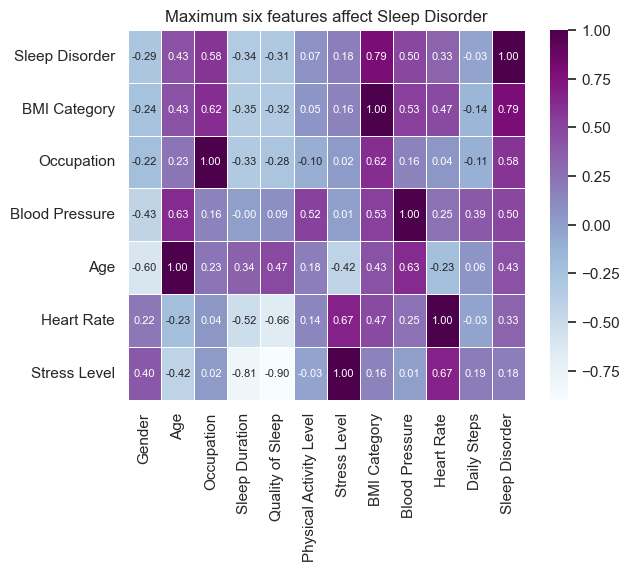

In [66]:
correlation=df.corr()
max_6_corr=correlation.nlargest(7,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()
